Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as LOF
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019

before = 5
after = 4

In [11]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
160405,2021-08-22 23:00:41,5fe8db7afec0573c471e065d,"[234.150375,244.44925,234.367142857143]","[0.4,0.5,0.5]","[7.6125,3.905,5.1]","[14532.67034,14306.33065,14006.936195]","[213.68047,0.36411,0.23962]",[],[],16.6175,...,[],[],17.18,42845.93724,214.28420000000003,\N,\N,"[-85.1,-87.5,-86.6]","[0,-120.3,119.6]",49.99
160406,2021-08-22 23:02:41,5fe8db7afec0573c471e065d,"[234.197571428571,244.860285714286,234.7352857...","[0.4,0.5,0.5]","[7.21125,3.9525,5.34]","[14532.670585,14306.330785,14006.93637]","[213.68047,0.36411,0.23962]",[],[],16.50375,...,[],[],16.96,42845.9378,214.28420000000003,\N,\N,"[-85.7,-87.4,-86.9]","[0,-120.3,119.6]",49.98
160407,2021-08-22 23:04:41,5fe8db7afec0573c471e065d,"[233.413571428571,245.112428571429,234.6962857...","[0.4,0.5,0.5]","[7.12142857142857,4.19125,5.3175]","[14532.670825,14306.330915,14006.93655]","[213.68047,0.36411,0.23962]",[],[],16.630179,...,[],[],17.11,42845.93835,214.28420000000003,\N,\N,"[-85.8,-86.9,-86.8]","[0,-120.3,119.7]",49.98
160408,2021-08-22 23:06:41,5fe8db7afec0573c471e065d,"[234.652571428571,245.414428571429,234.2284285...","[0.4,0.5,0.5]","[8.72571428571429,3.60714285714286,4.091428571...","[14532.671075,14306.331055,14006.93672]","[213.68047,0.36411,0.23962]",[],[],16.424286,...,[],[],19.09,42845.93889,214.28420000000003,\N,\N,"[-84.4,-87.8,-87.3]","[0,-120,119.7]",49.98
160409,2021-08-22 23:08:41,5fe8db7afec0573c471e065d,"[234.557428571429,244.292571428571,234.6171428...","[0.4,0.5,0.5]","[8,3.85428571428571,4.67857142857143]","[14532.671354,14306.33118,14006.936865]","[213.68047,0.36411,0.23962]",[],[],16.532857,...,[],[],17.21,42845.93945,214.28420000000003,\N,\N,"[-85,-87.5,-87.5]","[0,-120.2,119.6]",49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166895,2021-09-01 00:25:10,5fe8db7afec0573c471e065d,"[232.937375,243.50925,233.669875]","[0.4,0.5,0.5]","[6.80375,3.8375,5.42]","[14697.019295,14489.844365,14110.07109]","[230.46028,0.36411,0.23962]",[],[],16.06125,...,[],[],16.69,43296.93481,231.06401,\N,\N,"[-86,-87.6,-87.3]","[0,-120.1,119.8]",49.99
166896,2021-09-01 00:27:10,5fe8db7afec0573c471e065d,"[232.691285714286,242.854142857143,233.6005714...","[0.4,0.5,0.5]","[6.68375,3.89125,5.42428571428572]","[14697.019515,14489.84449,14110.071265]","[230.46028,0.36411,0.23962]",[],[],15.999286,...,[],[],16.46,43296.93532,231.06401,\N,\N,"[-85.9,-87.6,-87]","[0,-120.3,119.7]",49.99
166897,2021-09-01 00:29:10,5fe8db7afec0573c471e065d,"[232.96775,243.628625,233.13425]","[0.4,0.5,0.5]","[7.08428571428571,3.73285714285714,5.258571428...","[14697.019755,14489.84462,14110.071445]","[230.46028,0.36411,0.23962]",[],[],16.075714,...,[],[],16.74,43296.93587,231.06401,\N,\N,"[-85.7,-86.4,-87]","[0,-120.1,119.8]",50.0
166898,2021-09-01 00:31:10,5fe8db7afec0573c471e065d,"[233.168857142857,243.209571428571,233.599]","[0.4,0.5,0.5]","[6.8225,3.7775,5.3975]","[14697.019985,14489.84474,14110.071625]","[230.46028,0.36411,0.23962]",[],[],15.9975,...,[],[],16.61,43296.9364,231.06401,\N,\N,"[-85.9,-86.3,-86.4]","[0,-120.2,119.6]",50.0


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [12]:
n_neigh = 5

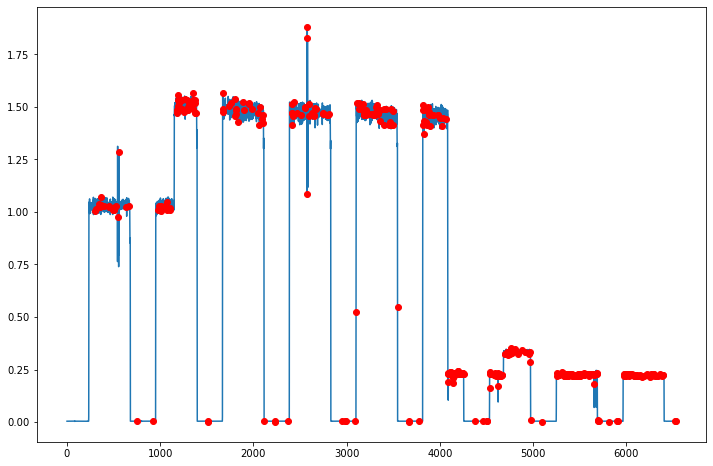

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

783
0 783
235 679 0
1499
783 1499
952 1396 1
2216
1499 2216
1669 2113 2
2933
2216 2933
2386 2830 3
3649
2933 3649
3101 3546 4
4364
3649 4364
3816 4255 5
5080
4364 5080


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


4534 4972 6
5797
5080 5797
5250 5688 7
6513
5797 6513
5966 6404 8


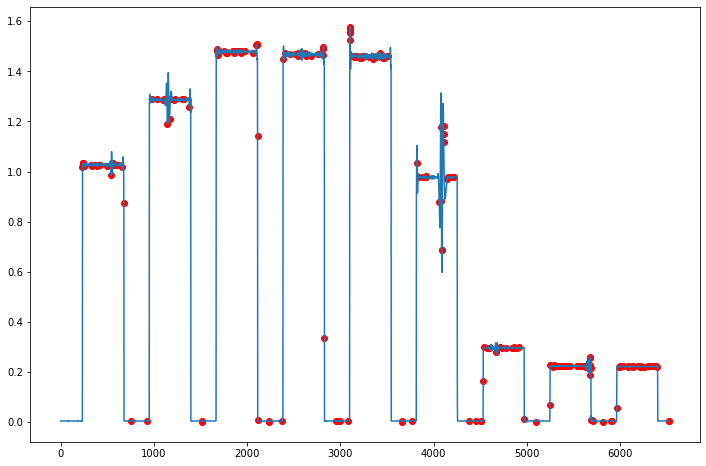

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

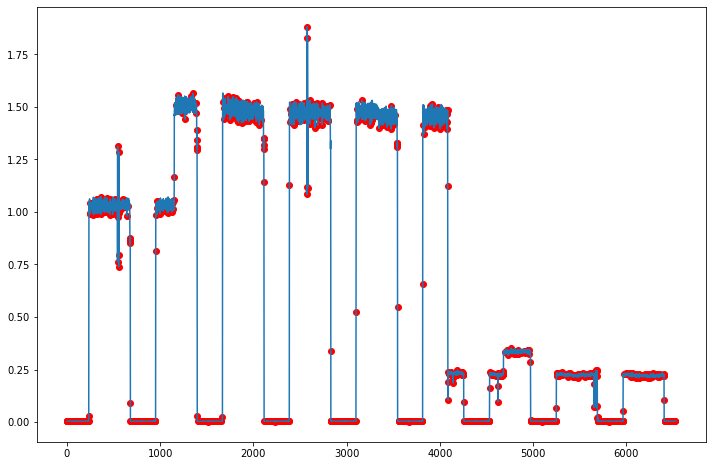

In [15]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

783
0 783
235 679 0
1499
783 1499
952 1396 1
2216
1499 2216
1669 2113 2
2933
2216 2933
2386 2830 3
3649
2933 3649
3101 3546 4
4364
3649 4364
3816 4255 5
5080
4364 5080


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


4534 4972 6
5797
5080 5797
5250 5688 7
6513
5797 6513
5966 6404 8


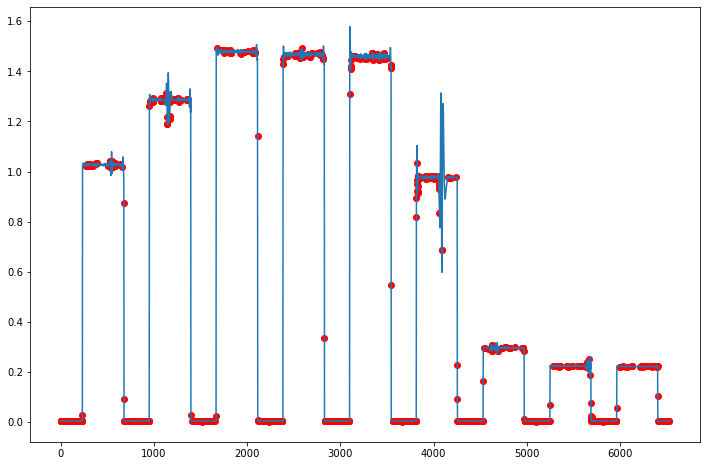

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  65  783 2216 2933 3649 4364 5080 5797 6513]
65 783 0
783 2216 1
2216 2933 2
2933 3649 3
3649 4364 4
4364 5080 5
5080 5797 6
5797 6513 7


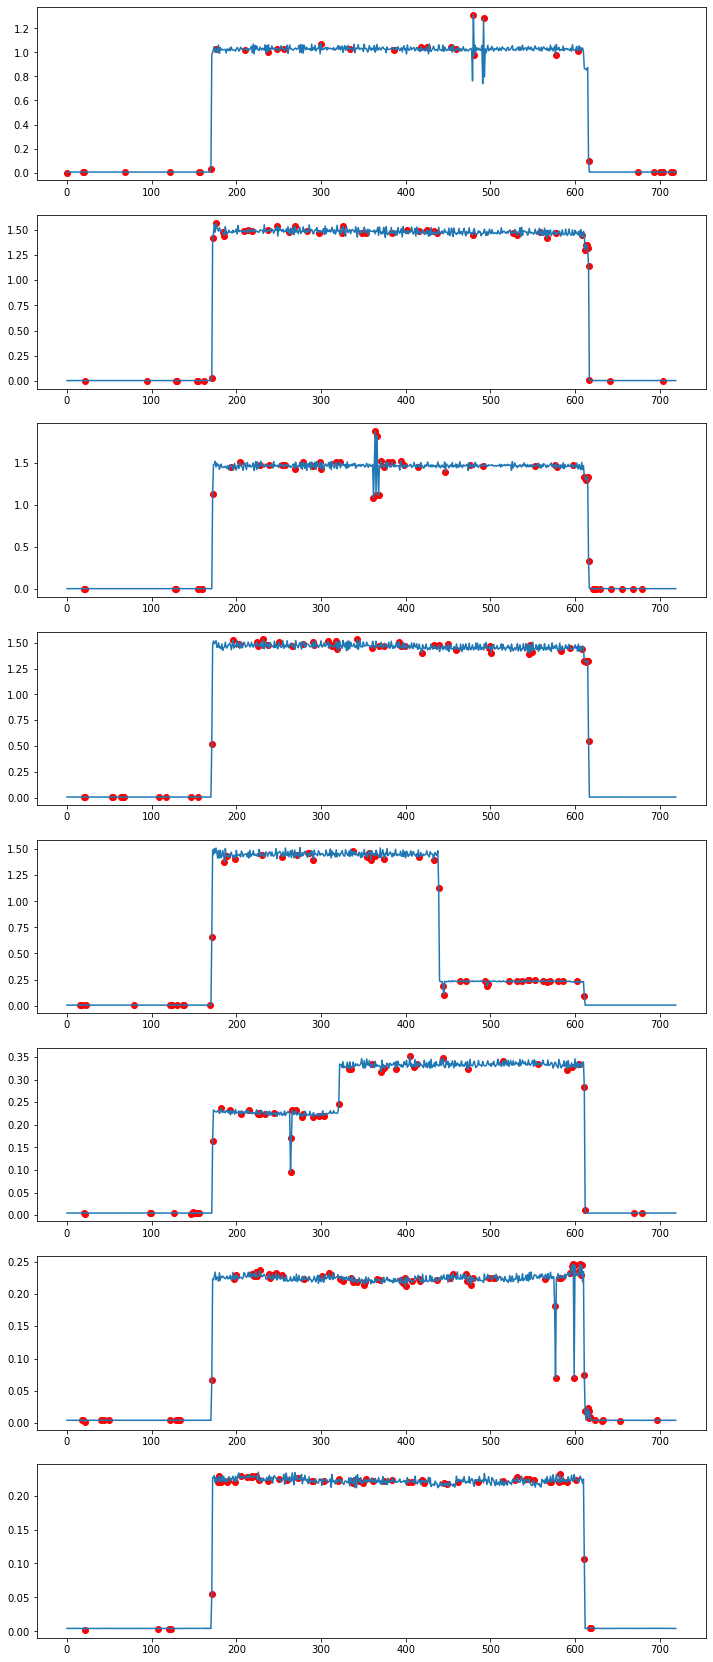

In [17]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

783
0 783
235 679 0
1499
783 1499
952 1396 1
2216
1499 2216
1669 2113 2
2933
2216 2933
2386 2830 3
3649
2933 3649
3101 3546 4
4364
3649 4364
3816 4255 5
5080
4364 5080


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


4534 4972 6
5797
5080 5797
5250 5688 7
6513
5797 6513
5966 6404 8
[  65  783 2216 2933 3649 4364 5080 5797 6513]
65 783 0
783 2216 1
2216 2933 2
2933 3649 3
3649 4364 4
4364 5080 5
5080 5797 6
5797 6513 7
(8, 720)


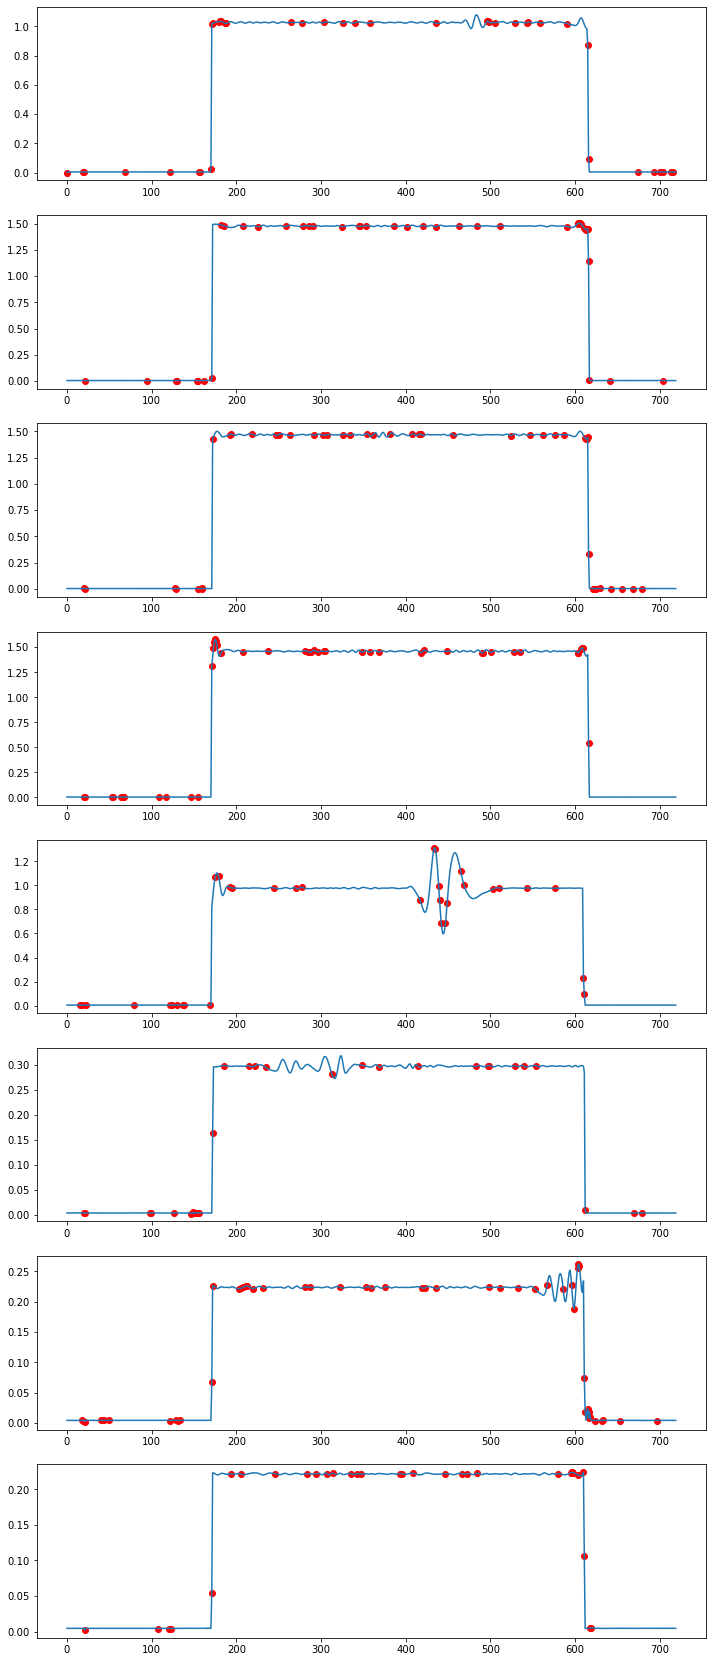

In [18]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(8, 720, 5)


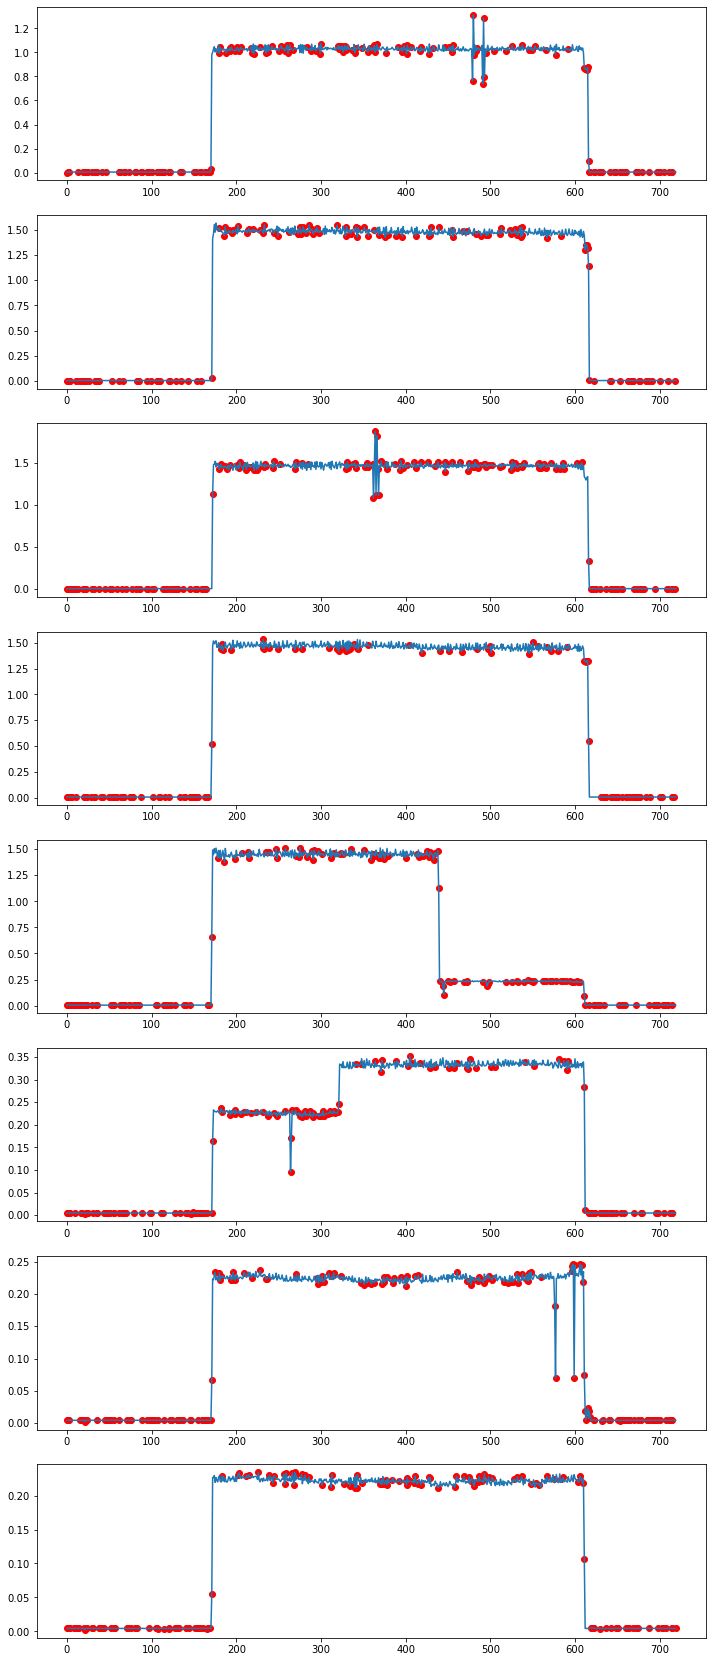

In [19]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

783
0 783
235 679 0
1499
783 1499
952 1396 1
2216
1499 2216
1669 2113 2
2933
2216 2933
2386 2830 3
3649
2933 3649
3101 3546 4
4364
3649 4364
3816 4255 5
5080
4364 5080


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


4534 4972 6
5797
5080 5797
5250 5688 7
6513
5797 6513
5966 6404 8
(8, 720, 5)


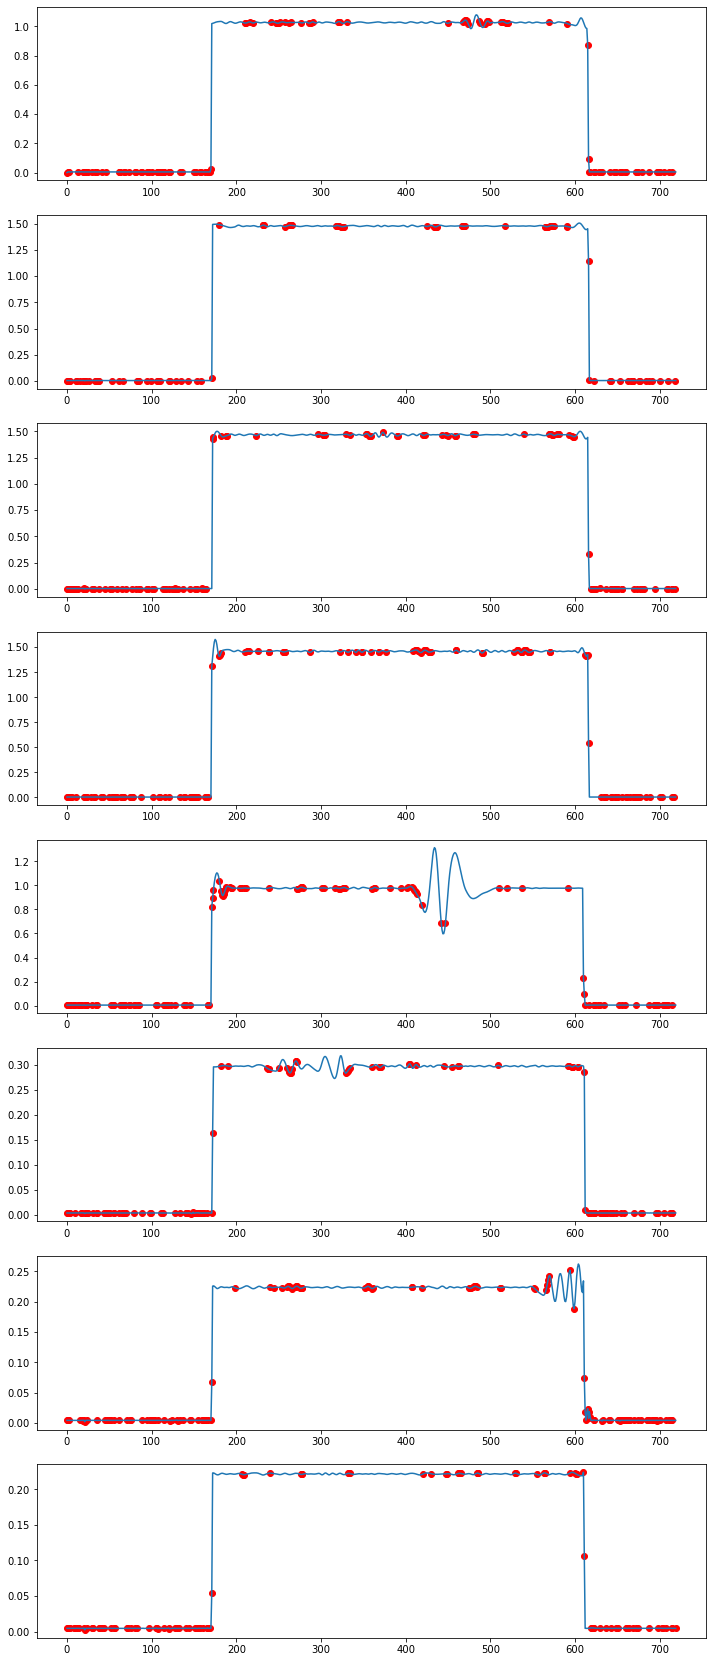

In [20]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))

model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)
    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

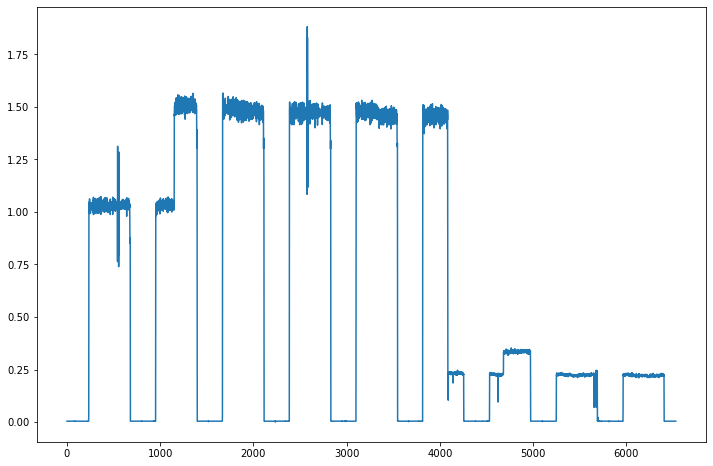

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=3)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

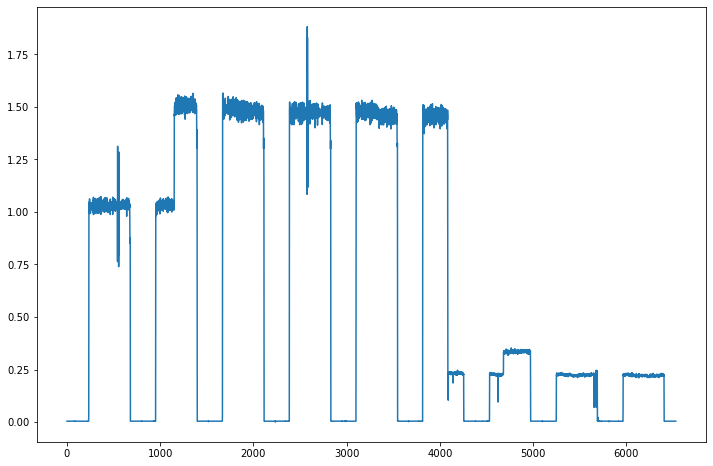

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

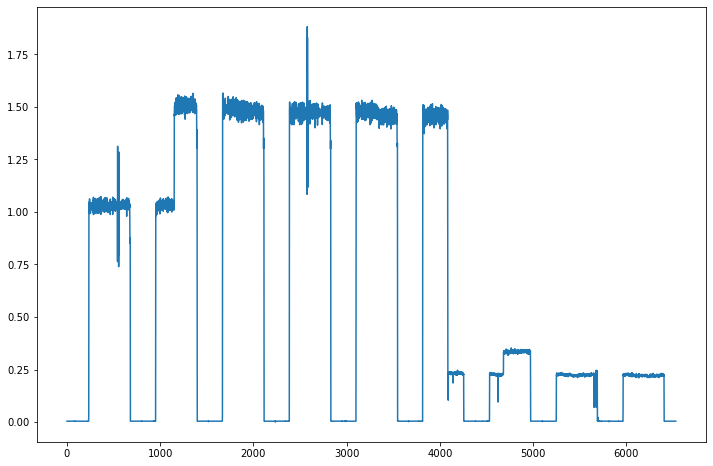

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


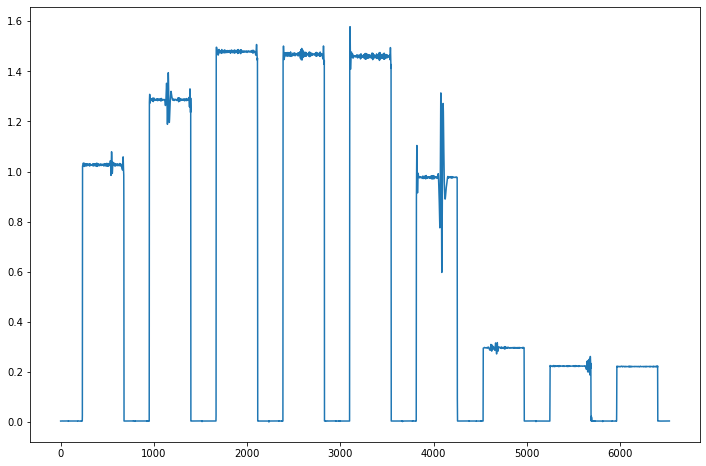

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


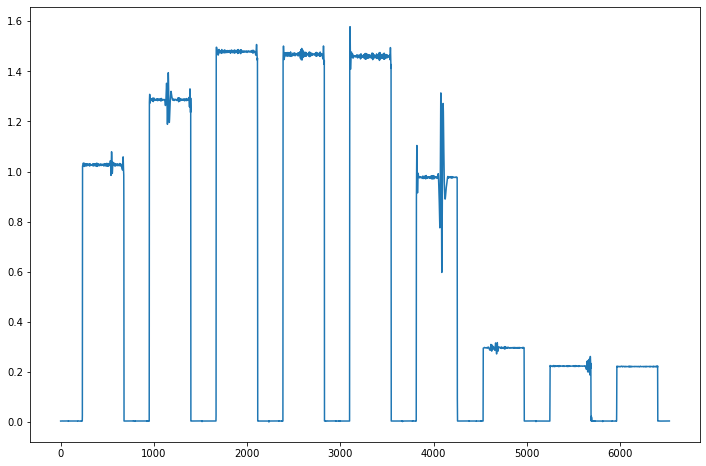

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


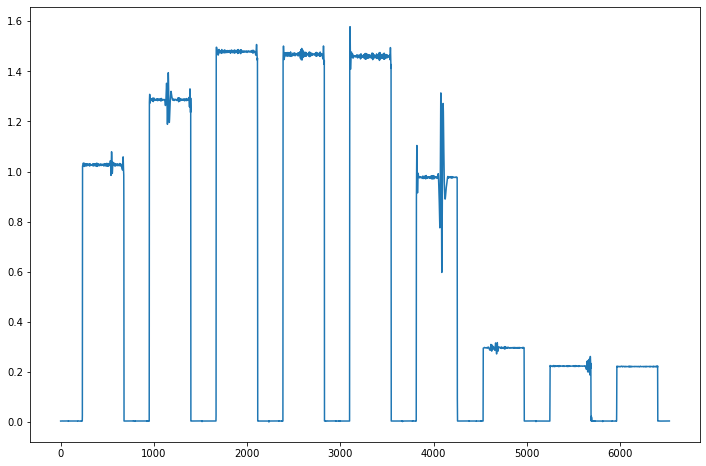

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=70)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)